# pyphysio tutorial

## 1. Signals

The class `Signal` together with the class `Algorithm` are the two main classes in pyphysio.

In this first tutorial we will see how the class `Signal` can be used to facilitate the management and processing of signals.

A signal is an ordered vector of timestamp-value pairs, where the timestamp is the instant at which the measured phenomenon had that value.
In pyphysio a signal is represented by the class **Signal** which extends the numpy.ndarray class.

In this part we will see the different types of signals that can be defined and their properties.

We start importing the packages needed for the tutorial:

In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

And then we import two classess of `pyphysio`: `EvenlySignal` and `UnevenlySignal`, both subclassess of the abstract class `Signal':

In [2]:
# import the Signal classes
from pyphysio import create_signal

Using dask. Scheduler: threads
Please cite:
Bizzego et al. (2019) 'pyphysio: A physiological signal processing library for data science approaches in physiology', SoftwareX


### 1.1 Evenly sampled signal

When the signal is sampled with a fixed sampling frequency it is sufficient to know the timestamp at which the acquisition started and the sampling frequency (assumed to be constant) to reconstruct the timestamp of each sample.

Therefore to create an *evenly sampled signal** these are the input attributes needed:
* ``values`` : values of the signal;
* ``sampling_freq`` : (float>0) sampling frequency;
* ``start_time`` : (float) temporal reference of the start of the signal. This is optional, if omitted it will set to 0;
* ``info`` : (dict) dictionary that will contain general (custom) information about the signal.

Class functions are provided to facilitate the management and processing of signals. For instance:
* `get_...()` and `set_...()` type functions can be used to check/set signal attributes;
* `plot()` will plot the signal using matplotlib;
* `segment_time(t_start, t_stop)` and `segment_idx(idx_start, idx_stop)` can be used to extract a portion of the signal;
* `resample(fout)` can be used to change the sampling frequency.

**TODO: details about values, meaning of axes and slicing**

#### 1.1.1 Creation of an *evenly sampled* signal

In the following we generate a fake evenly samples signal using random generated numbers. Then we will use the methods provided by the class to inspect the signal characteristics:

In [3]:
# create a signal

## create fake data
np.random.seed(4)
signal_values = np.random.uniform(0, 1, size = 1000)

## set the sampling frequency
fsamp = 100 # Hz

## set the starting time
tstart = 100 # s

## create the Evenly signal
s_fake = create_signal(data = signal_values, sampling_freq = fsamp, start_time = tstart, info  = {'type': 'fake', 'subject': 'SUB001'})

# chech signal properties
print('Sampling frequency: {}'.format( s_fake.p.get_sampling_freq() ))
print('Start time:         {}'.format( s_fake.p.get_start_time() ))
print('End time:           {}'.format( s_fake.p.get_end_time() ))
print('Duration:           {}'.format( s_fake.p.get_duration() ))
print('Signal info  :      {}'.format( s_fake.p.get_info() ))
print('First ten instants: {}'.format( s_fake.p.get_times()[0:10] ))

Sampling frequency: 100.0
Start time:         100.0
End time:           109.99
Duration:           9.989999999999995
Signal info  :      {'MAIN': 'signal', 'history': ['signal']}
First ten instants: [100.   100.01 100.02 100.03 100.04 100.05 100.06 100.07 100.08 100.09]


#### 1.1.2 Plotting a signal

A shortcut is provided in `pyphysio` to plot a signal, using the `matplotlib` library:

In [4]:
## plot
s_fake.p.plot()

### 1.2 Unevenly sampled signal

TODO: create_signal, mechanism with na, sampling freq

### 1.3 Working with physiological signals

In this second example we import the sample data included in `pyphysio` to show how the `EvenlySignal` class can be used to represent physiological signals:

In [17]:
# import data from included examples
from pyphysio import TestData

ecg_data = TestData.ecg()
eda_data = TestData.eda()

The imported values can be used to create two new signals of the `EvenlySignal` class.

Note that we set different starting times for the ecg and the eda signal:

In [18]:
# create two signals
fsamp = 2048
tstart_ecg = 15
tstart_eda = 5

ecg = create_signal(data = ecg_data, 
                 sampling_freq = fsamp, 
                 start_time = tstart_ecg)

eda = create_signal(data = eda_data, 
                 sampling_freq = fsamp, 
                 start_time = tstart_eda)

In the following plot note that the EDA signal start 10 seconds before the ECG signal.

Using the `start_time` parameter is therefore possible to manually synchronize multiple signals.

In [19]:
# plot
ax1 = plt.subplot(211)
ecg.p.plot()
plt.subplot(212, sharex=ax1)
eda.p.plot()

In [20]:
# check signal properties
print('ECG')
print('Sampling frequency: {}'.format( ecg.p.get_sampling_freq() ))
print('Start time:         {}'.format( ecg.p.get_start_time() ))
print('End time:           {}'.format( ecg.p.get_end_time() ))
print('Duration:           {}'.format( ecg.p.get_duration() ))
print('First ten instants: {}'.format( ecg.p.get_times()[0:10] ))
print('')
print('EDA')
print('Sampling frequency: {}'.format( eda.p.get_sampling_freq() ))
print('Start time:         {}'.format( eda.p.get_start_time() ))
print('End time:           {}'.format( eda.p.get_end_time() ))
print('Duration:           {}'.format( eda.p.get_duration() ))
print('First ten instants: {}'.format( eda.p.get_times()[0:10] ))

ECG
Sampling frequency: 2048.0
Start time:         15.0
End time:           134.99951171875
Duration:           119.99951171875
First ten instants: [15.         15.00048828 15.00097656 15.00146484 15.00195312 15.00244141
 15.00292969 15.00341797 15.00390625 15.00439453]

EDA
Sampling frequency: 2048.0
Start time:         5.0
End time:           124.99951171875
Duration:           119.99951171875
First ten instants: [5.         5.00048828 5.00097656 5.00146484 5.00195312 5.00244141
 5.00292969 5.00341797 5.00390625 5.00439453]


### 1.4 Multi-channels, multi-components





In [21]:
fake_multi_values = np.random.normal(size = (1000, 3, 5))

fake_multi_values = fake_multi_values * np.array([1,2,3]).reshape(1,-1,1)
fake_multi_values = fake_multi_values + np.array([10,20,30,40,50]).reshape(1,1,-1)


fake_multi_signal = create_signal(fake_multi_values, sampling_freq = 10)

fake_multi_signal.p.plot()

In [24]:
## create fake data
signal_values = np.arange(100)

In [25]:
## create an unevenly sampled signal defining the instants
fsamp=10
x_values_time = np.arange(100)/fsamp
x_values_time[-1] = 12.5
x_values_time += 10

s_fake_time = create_signal(data = signal_values, 
                            times = x_values_time)

Note in the following plot that the interval between the last two samples is different from all the others:

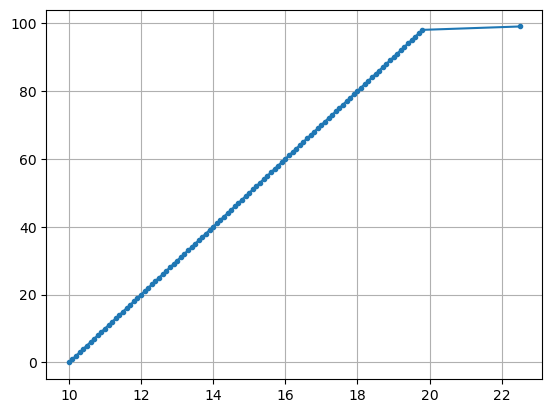

In [26]:
#plot
s_fake_time.p.plot('.')

In [27]:
# note that the times are the same but not the starting_time nor the indices:

# check samples instants
print('Instants:')
print(s_fake_time.p.get_times())

# check start_time
print('Start time:')
print(s_fake_time.p.get_start_time())

Instants:
[10.  10.1 10.2 10.3 10.4 10.5 10.6 10.7 10.8 10.9 11.  11.1 11.2 11.3
 11.4 11.5 11.6 11.7 11.8 11.9 12.  12.1 12.2 12.3 12.4 12.5 12.6 12.7
 12.8 12.9 13.  13.1 13.2 13.3 13.4 13.5 13.6 13.7 13.8 13.9 14.  14.1
 14.2 14.3 14.4 14.5 14.6 14.7 14.8 14.9 15.  15.1 15.2 15.3 15.4 15.5
 15.6 15.7 15.8 15.9 16.  16.1 16.2 16.3 16.4 16.5 16.6 16.7 16.8 16.9
 17.  17.1 17.2 17.3 17.4 17.5 17.6 17.7 17.8 17.9 18.  18.1 18.2 18.3
 18.4 18.5 18.6 18.7 18.8 18.9 19.  19.1 19.2 19.3 19.4 19.5 19.6 19.7
 19.8 22.5]
Start time:
10.0


### 1.3 Segmentation of signals

**TODO: update**

`segment_time(t_start, t_stop)` is used to extract a portion of the signal between the instants `t_start` and
`t_stop`

The output signal will inherit **`sampling_freq`** and **`signal_nature`** but the **`start_time`** will be set to **`t_start`** or to the instant corresponding to **`idx_start`** accordingly to the method used.

In [14]:
# segmentation of ES
ecg_segment = ecg.p.segment_time(45, 54)
eda_segment = eda.p.segment_time(45, 54)

45.0


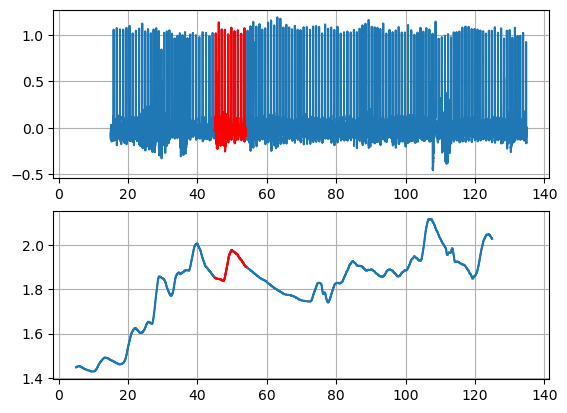

In [15]:
# plot
ax1 = plt.subplot(211)
ecg.p.plot()
ecg_segment.p.plot('r')

plt.subplot(212, sharex=ax1)
eda.p.plot()
eda_segment.p.plot('r')

print(ecg_segment.p.get_start_time())